<Figure size 800x600 with 0 Axes>

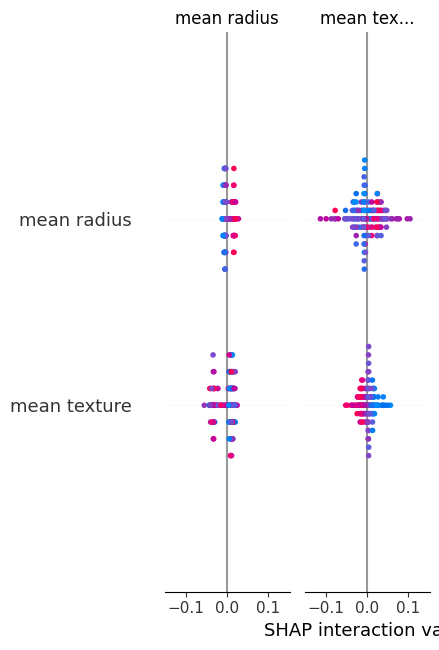

In [1]:
import os
import matplotlib
if os.environ.get("CI") == "true":
    matplotlib.use("Agg")

import matplotlib.pyplot as plt  # noqa: E402
from sklearn.datasets import load_breast_cancer  # noqa: E402
from sklearn.model_selection import train_test_split  # noqa: E402
from sklearn.ensemble import RandomForestClassifier  # noqa: E402
import shap  # noqa: E402

# Train model
D = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(D.data, D.target, test_size=0.25, random_state=0)
model = RandomForestClassifier(n_estimators=200, random_state=0, min_samples_leaf=2, max_features="sqrt")
model.fit(X_train, y_train)

# SHAP summary
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")
values = explainer.shap_values(X_test)
vals = values[1] if isinstance(values, list) else values
plt.figure(figsize=(8, 6))
shap.summary_plot(vals, X_test, feature_names=D.feature_names, show=False)
plt.tight_layout(); plt.show()

